## Classic ML models

In [130]:
import pandas as pd
import os
import numpy as np

import seaborn as sns
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import tqdm

In [240]:
fname = "../Datasets/ChargePoint Data CY20Q4 SPATAIL.csv"
df = pd.read_csv(fname, index_col=0)
spatial_fname = "../Datasets/spatial_populartimes.csv"
spatial_features = pd.read_csv(spatial_fname, index_col=0)


/Users/mikhailgasanov/geo/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (30) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## 1. Select categories 

In [249]:
target_categories = ['shopping_mall', 'restaurant', 'cafe',
       'grocery_or_supermarket', 'bar',
       'beauty_salon']
spatial_features = spatial_features.loc[spatial_features['category'].isin(target_categories)]

## 2. Prepare spatial features

In [308]:
def get_spatial_features(row: pd.Series):
    target_categories = ['shopping_mall', 'restaurant', 'cafe',
       'grocery_or_supermarket', 'bar',
       'beauty_salon']
    dictPopular = dict.fromkeys(target_categories, 0)
    cluster = row['cluster']
    select = spatial_features.loc[spatial_features['cluster']==cluster]
    weekDays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
    dow = weekDays[row['Start Date'].dayofweek]
    hour = row['Start Date'].hour + 1
    res = select.groupby('category').mean().loc[: ,dow+'_'+str(hour)]
    for cat in res.keys(): 
        dictPopular[cat] = res[cat]        
    
    return dictPopular

In [313]:
sp_list = []
for row in tqdm.notebook.tqdm(df.iterrows()):
    sp_list.append(get_spatial_features(row[1]))

0it [00:00, ?it/s]

In [317]:
res_df = pd.concat([df, pd.DataFrame(sp_list)], axis=1)

## 3. Prepare weather features

In [319]:
weather = pd.read_csv('../Datasets/weather_palalto.csv', index_col=0)

In [320]:
cols = ['DAY', 'TEMP', 'RAIN']
weather = weather[cols]
weather.loc[:, 'Start Date'] = pd.to_datetime(weather['DAY'])

In [321]:
weather['DAY'] = pd.to_datetime(weather['DAY'])

In [323]:
res_df.loc[:, 'DAY'] = res_df['Start Date'].dt.floor('D')

In [324]:
df_weather = res_df.merge(weather, on = 'DAY')

In [327]:
df_weather = df_weather.drop(columns=['Start Date_y', 'DAY', 'Start'])

In [328]:
df_weather.to_csv('../Datasets/PalAlto_Spatial_Weather.csv')

## End 🙏

In [112]:
cols = ['Station Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone', 'Total Duration (hh:mm:ss)',
       'Charging Time (hh:mm:ss)', 'Energy (kWh)',
       'Latitude', 'Longitude', 'latitude', 'longitude', 'cluster']
df = df[cols]

In [257]:
df.loc[:, 'Start Date'] = pd.to_datetime(df.loc[:, 'Start Date'], format='%m/%d/%Y %H:%M')
df['Start'] = pd.to_datetime(df['Start Date'], format='%m/%d/%Y %H:%M')
df['Start'] = df['Start'].dt.floor('D')

In [176]:
def getGrouped(df:pd.DataFrame)->pd.DataFrame:
    """
    Group dataframe daily and hourly
    """
    return df.groupby((df.index.dayofweek) * 24 + (df.index.hour)).sum()

In [235]:
df['cluster'].unique()

array([ 6,  2,  3,  4,  5, 15, 16, 17, 14,  8,  7, 11, 10,  9,  1, 12, 13])

In [236]:
cluster_mask = df['cluster'] == 1
cluster_df =  getGrouped(df.loc[cluster_mask])

# cluster_mask = df['cluster'] == 1
# cluster_df =  getGrouped(df.loc[cluster_mask])

cluster_df = df.loc[cluster_mask]
cluster_df = getGrouped(cluster_df)
cluster_df = cluster_df.reindex(range(169)).fillna(0.)

In [238]:
cluster_df

,Energy (kWh),Latitude,Longitude,latitude,longitude,cluster
Start Date,,,,,,
0,8.601,37.443146,-122.163017,37.443,-122.163,1.0
1,0.000,0.000000,0.000000,0.000,0.000,0.0
2,0.000,0.000000,0.000000,0.000,0.000,0.0
3,19.959,37.443443,-122.163139,37.443,-122.163,1.0
4,204.758,336.990888,-1099.468343,336.987,-1099.467,9.0
...,...,...,...,...,...,...
164,413.396,2508.698921,-8184.928849,2508.681,-8184.921,67.0
165,179.289,823.752304,-2687.588637,823.746,-2687.586,22.0
166,115.148,411.876593,-1343.794556,411.873,-1343.793,11.0


Text(0, 0.5, 'Energy (kWh)')

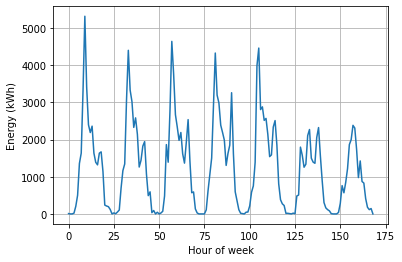

In [237]:
cluster_df['Energy (kWh)'].plot()
plt.grid()
plt.xlabel('Hour of week')
plt.ylabel('Energy (kWh)')

In [221]:
mask_spatial = spatial_features['cluster']==1
spatial_df = spatial_features.loc[mask_spatial]

In [222]:
grouped_T = spatial_df.groupby('category').mean().T.iloc[:-6,:]

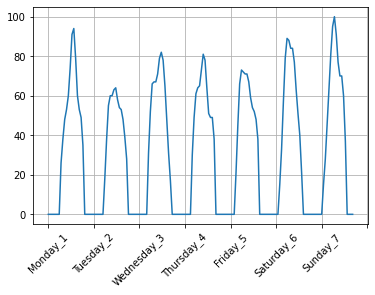

In [223]:
grouped_T['cafe'].plot()
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [224]:
cluster_df

,Energy (kWh),Latitude,Longitude,latitude,longitude,cluster
Start Date,,,,,,
0,8.601,37.443146,-122.163017,37.443,-122.163,1.0
1,0.000,0.000000,0.000000,0.000,0.000,0.0
2,0.000,0.000000,0.000000,0.000,0.000,0.0
3,19.959,37.443443,-122.163139,37.443,-122.163,1.0
4,204.758,336.990888,-1099.468343,336.987,-1099.467,9.0
...,...,...,...,...,...,...
164,413.396,2508.698921,-8184.928849,2508.681,-8184.921,67.0
165,179.289,823.752304,-2687.588637,823.746,-2687.586,22.0
166,115.148,411.876593,-1343.794556,411.873,-1343.793,11.0


In [225]:
cluster_df

,Energy (kWh),Latitude,Longitude,latitude,longitude,cluster
Start Date,,,,,,
0,8.601,37.443146,-122.163017,37.443,-122.163,1.0
1,0.000,0.000000,0.000000,0.000,0.000,0.0
2,0.000,0.000000,0.000000,0.000,0.000,0.0
3,19.959,37.443443,-122.163139,37.443,-122.163,1.0
4,204.758,336.990888,-1099.468343,336.987,-1099.467,9.0
...,...,...,...,...,...,...
164,413.396,2508.698921,-8184.928849,2508.681,-8184.921,67.0
165,179.289,823.752304,-2687.588637,823.746,-2687.586,22.0
166,115.148,411.876593,-1343.794556,411.873,-1343.793,11.0


In [228]:
grouped_T = grouped_T.reset_index()

In [229]:
grouped_T.loc[:, 'Energy (kWh)'] = cluster_df['Energy (kWh)']

In [232]:
# Fill diagonal and upper half with NaNs
corr = grouped_T.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

/var/folders/1f/xyznj37x1n337kxt0v5533rw0000gn/T/ipykernel_98185/978642386.py:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (corr


category,cafe,clothing_store,grocery_or_supermarket,health,locality,night_club,restaurant,shopping_mall,spa,Energy (kWh)
category,,,,,,,,,,
cafe,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
clothing_store,0.81,nan,nan,nan,nan,nan,nan,nan,nan,nan
grocery_or_supermarket,0.82,0.80,nan,nan,nan,nan,nan,nan,nan,nan
health,0.40,0.23,0.21,nan,nan,nan,nan,nan,nan,nan
locality,0.48,0.42,0.55,0.24,nan,nan,nan,nan,nan,nan
night_club,0.05,0.21,0.45,-0.20,0.30,nan,nan,nan,nan,nan
restaurant,0.20,0.28,0.66,-0.07,0.38,0.77,nan,nan,nan,nan
shopping_mall,0.78,0.93,0.80,0.21,0.36,0.23,0.32,nan,nan,nan
spa,0.68,0.64,0.85,0.16,0.48,0.61,0.71,0.62,nan,nan


<AxesSubplot:xlabel='category', ylabel='category'>

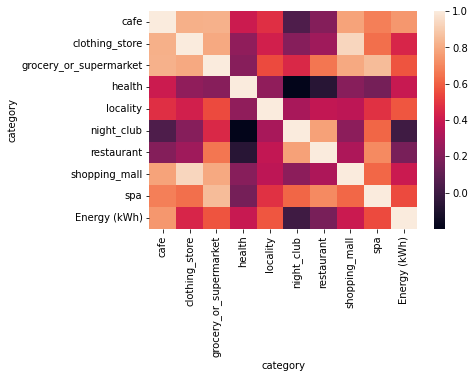

In [233]:
import seaborn as sns
corr = grouped_T.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)